<a href="https://colab.research.google.com/github/Mrsth/Pandas_practice/blob/master/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
all_files = [file for file in os.listdir('/content/drive/My Drive/Colab Notebooks/Sales_Data')]
all_files_df = pd.DataFrame()

for file in all_files:
  df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Sales_Data/"+file)
  all_files_df = pd.concat([all_files_df,df])

# all_files_df.shape
all_files_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


ADDING A MONTH COLUMN

In [ ]:
all_files_df["Month"] = all_files_df['Order Date'].str[1:2]
all_files_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


**Filtering out all the rows with all Nan Values for every column.**

In [ ]:
nan_df = all_files_df[all_files_df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing all the Nan (Not any number) values from our dataframe.**

For this dataframe.dropna(how="all") is used where "all" means remove all Nan from the whole dataframe. Whereas "any" means remove all the rows with atleast one "Nan" values .

In [ ]:
all_files_df = all_files_df.dropna(how="all")
all_files_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


**Converting "Quantity Ordered" and "Price Each" series to numeric value**

In [ ]:
all_files_df["Quantity Ordered"] = pd.to_numeric(all_files_df["Quantity Ordered"])
all_files_df["Price Each"] = pd.to_numeric(all_files_df["Price Each"])
all_files_df["Month"] = pd.to_numeric(all_files_df["Month"])

all_files_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Total sales         float64
dtype: object

**Question number 1: Now let's create a sales column**


To calculate the best month for sales

-> First filter the data.

-> Group by month

-> Finally find the max sales.

In [ ]:
all_files_df["Total sales"] = all_files_df["Quantity Ordered"] * all_files_df["Price Each"]
all_files_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Total sales         float64
dtype: object

In [ ]:
all_files_df["Month"].unique()

array([4, 5, 8, 9, 6, 7, 2, 1, 3, 0])

In [ ]:
best_sales_month = all_files_df.groupby(["Month"])[["Quantity Ordered","Price Each", "Total sales"]].sum()
best_sales_month.head(20)

,Quantity Ordered,Price Each,Total sales
Month,,,
0,22701,3.714952e+06,3.736124e+06
1,30696,4.992250e+06,5.021738e+06
2,41559,6.775432e+06,6.813598e+06
3,17003,2.791201e+06,2.807094e+06
4,20558,3.367671e+06,3.390670e+06
5,18665,3.134905e+06,3.152387e+06
6,15251,2.562002e+06,2.577778e+06
7,16070,2.632240e+06,2.647476e+06
8,13446,2.229633e+06,2.243756e+06


In [ ]:
best_sales_month["Total sales"].max()


6813597.820003046

In [ ]:
best_sales_month.loc[best_sales_month["Total sales"] == 6813597.820003046]

,Quantity Ordered,Price Each,Total sales
Month,,,
2,41559,6.775432e+06,6.813598e+06


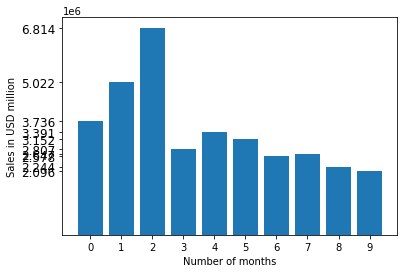

In [ ]:
import matplotlib.pyplot as plt

months = [int(month) for month in range(10) ] 

plt.bar(months,best_sales_month["Total sales"])
plt.xticks(months)
plt.yticks(best_sales_month["Total sales"])
plt.yticks(fontsize="large")
plt.xlabel("Number of months")
plt.ylabel("Sales in USD million")
plt.show()

**Question 2: Calculate the city with highest number of sales.**

In [ ]:
#adding a city column in the dataframe
all_files_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
all_files_df["City"] = all_files_df["Purchase Address"].apply(lambda x: x.split(',')[1])
all_files_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [ ]:
unique_cities = all_files_df["City"].unique()
len(unique_cities)

9

In [ ]:
best_sales_cities = all_files_df.groupby("City")[["Total sales"]].agg([sum])
best_sales_cities.columns

MultiIndex([('Total sales', 'sum')],
           )

In [ ]:
best_sales_cities = all_files_df.groupby("City")[["Total sales"]].agg([sum])
best_sales_cities.columns=[["City sale"]]
best_sales_cities

,City sale
City,
Atlanta,2.795495e+06
Austin,1.819567e+06
Boston,3.660242e+06
Dallas,2.767972e+06
Los Angeles,5.452385e+06
New York City,4.662204e+06
Portland,2.320491e+06
San Francisco,8.262057e+06
Seattle,2.746055e+06


In [ ]:
best_sales_cities.columns

MultiIndex([('City sale',)],
           )

In [ ]:
best_sales_cities.dtypes

Total sales in each cities    float64
dtype: object